In [ ]:
!pip download kagglehub
!pip download pandas
!pip download numpy
!pip download matplotlib
!pip download seaborn
!pip download scipy

  File was already downloaded /content/kagglehub-0.3.13-py3-none-any.whl
  File was already downloaded /content/packaging-25.0-py3-none-any.whl
  File was already downloaded /content/pyyaml-6.0.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl
  File was already downloaded /content/requests-2.32.5-py3-none-any.whl
  File was already downloaded /content/tqdm-4.67.1-py3-none-any.whl
  File was already downloaded /content/charset_normalizer-3.4.4-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl
  File was already downloaded /content/idna-3.11-py3-none-any.whl
  File was already downloaded /content/urllib3-2.5.0-py3-none-any.whl
  File was already downloaded /content/certifi-2025.10.5-py3-none-any.whl
Successfully downloaded kagglehub packaging pyyaml requests tqdm certifi charset_normalizer idna urllib3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

100%|██████████| 17.4k/17.4k [00:00<00:00, 22.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/julianbloise/winners-formula-1-1950-to-2025/versions/4
Using dataset file: /root/.cache/kagglehub/datasets/julianbloise/winners-formula-1-1950-to-2025/versions/4/winners_f1_1950_2025_v2.csv
Dataset Shape: (1142, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1142 non-null   object 
 1   continent    1142 non-null   object 
 2   grand_prix   1142 non-null   object 
 3   circuit      1142 non-null   object 
 4   winner_name  1142 non-null   object 
 5   team         1142 non-null   object 
 6   time         1142 non-null   object 
 7   laps         1142 non-null   float64
 8   year         1142 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 80.4+ KB
None

Numeric Columns: ['laps', 'year']

--- Statistical Summary

laps: W=0.799, p=0.000 --> Not Normal
year: W=0.956, p=0.000 --> Not Normal


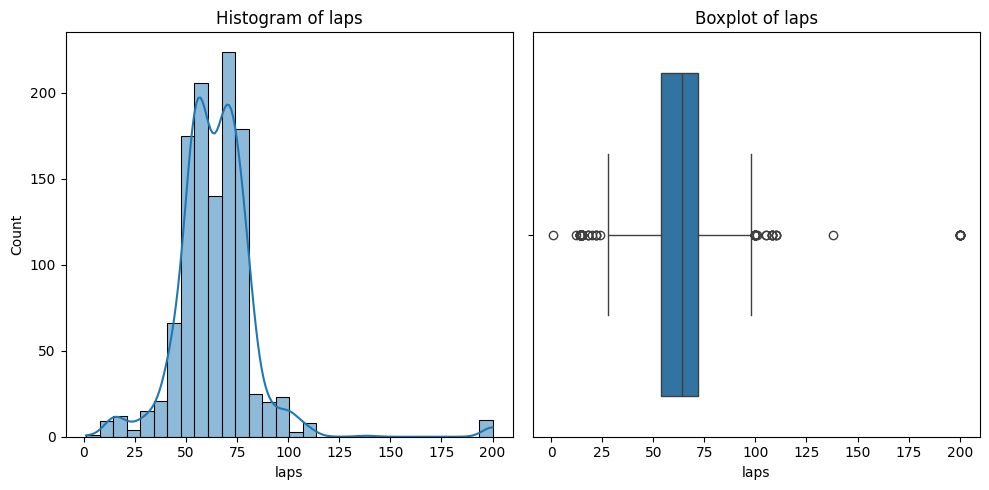

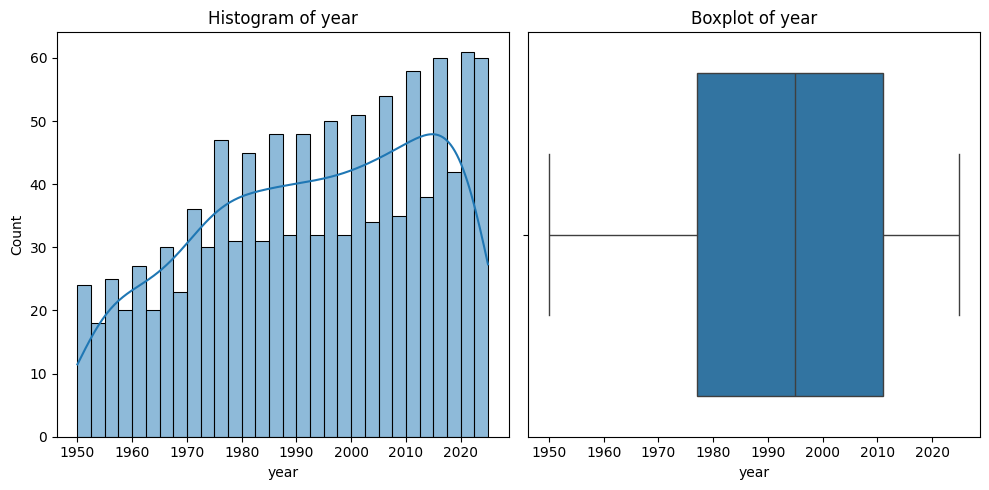

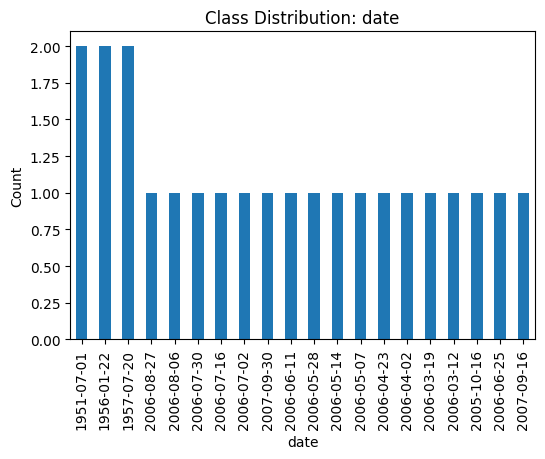

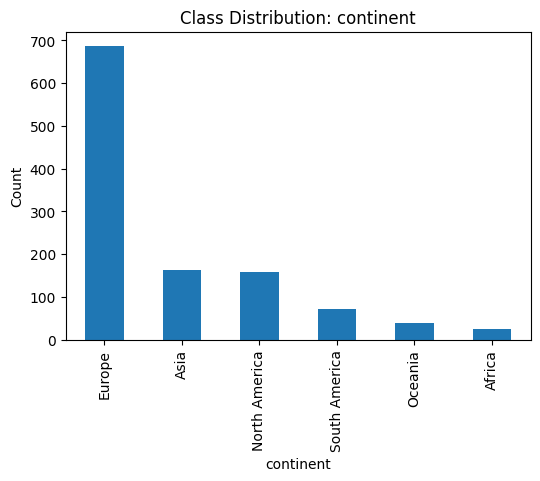

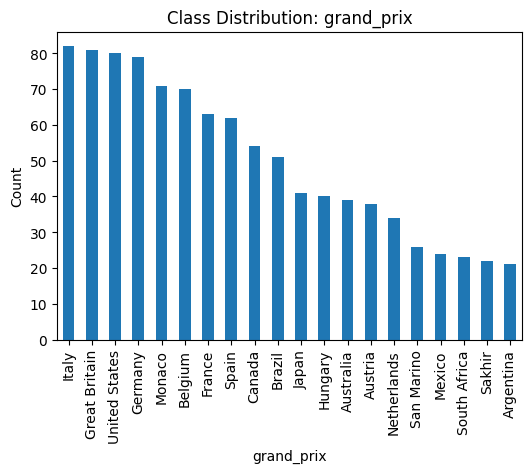

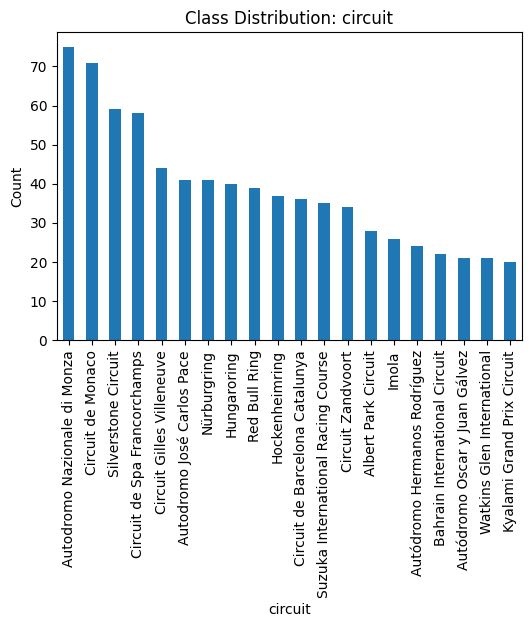

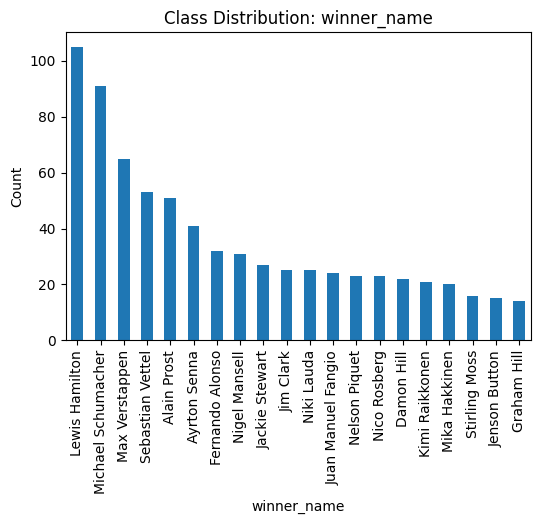

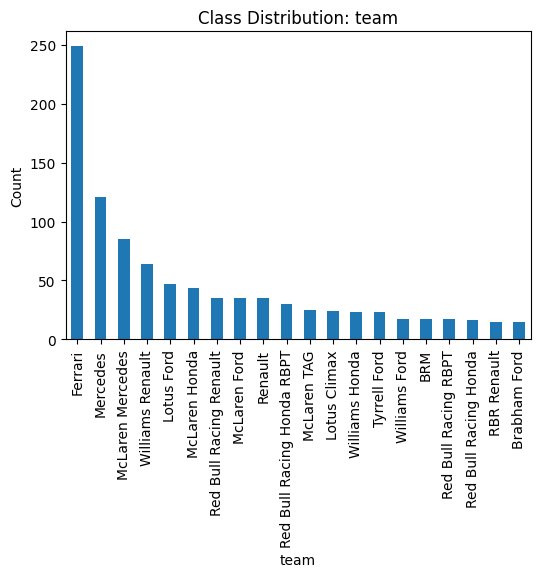

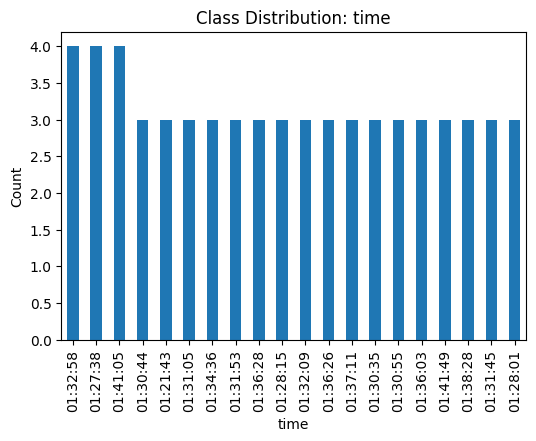

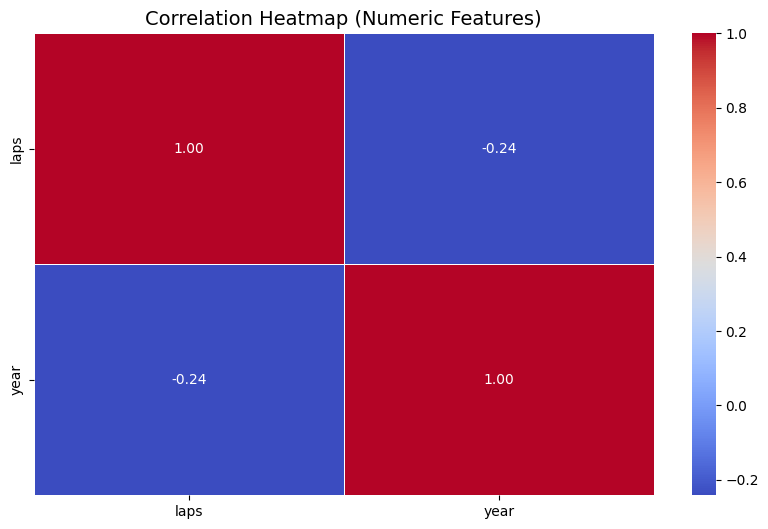

In [ ]:
# -----------------------------
# Name: Harsh Siddharth Brahmecha
# PRN: 20220802003
# -----------------------------

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os


path = kagglehub.dataset_download("julianbloise/winners-formula-1-1950-to-2025")
print("Path to dataset files:", path)

# Find CSV file in dataset path
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if not csv_files:
    raise FileNotFoundError("No CSV file found in dataset path.")
dataset_file = os.path.join(path, csv_files[0])
print("Using dataset file:", dataset_file)

# -----------------------------
# Load dataset
# -----------------------------
df = pd.read_csv(dataset_file)

# -----------------------------
# Basic Info
# -----------------------------
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumeric Columns:", numeric_cols.tolist())

# -----------------------------
# Central Tendency: Mean, Median, Mode
# -----------------------------
desc = pd.DataFrame(index=numeric_cols)
desc['Mean'] = df[numeric_cols].mean()
desc['Median'] = df[numeric_cols].median()
desc['Mode'] = df[numeric_cols].mode().iloc[0]

# -----------------------------
# Spread and Shape: Std, Skewness, Kurtosis
# -----------------------------
desc['Std Dev'] = df[numeric_cols].std()
desc['Skewness'] = df[numeric_cols].skew()
desc['Kurtosis'] = df[numeric_cols].kurt()

print("\n--- Statistical Summary ---")
print(desc)

# -----------------------------
# Bias / Normality Check
# -----------------------------
print("\n--- Normality Tests (Shapiro-Wilk) ---")
for col in numeric_cols:
    try:
        stat, p = stats.shapiro(df[col].dropna())
        print(f"{col}: W={stat:.3f}, p={p:.3f} --> {'Normal' if p>0.05 else 'Not Normal'}")
    except Exception as e:
        print(f"{col}: Could not run Shapiro-Wilk ({e})")

# -----------------------------
# Visualization
# -----------------------------
for col in numeric_cols:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

# -----------------------------
# Class imbalance check (categorical features)
# -----------------------------
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().head(20).plot(kind='bar')  # Top 20 to avoid clutter
    plt.title(f"Class Distribution: {col}")
    plt.ylabel("Count")
    plt.show()

if len(numeric_cols) > 1:
    plt.figure(figsize=(10,6))
    corr_matrix = df[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap (Numeric Features)", fontsize=14)
    plt.show()
else:
    print("Not enough numeric columns for correlation heatmap.")